# Importing libraries and Reading the data

In [2]:
#importing libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
#import google.colab
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import pickle
import xgboost as xgb

In [3]:
#reading the file to a DataFrame
df_train =  pd.read_csv('Training_Data_Set.csv')

# Reviewing the Data

In [4]:
df_train.shape

(53515, 17)

In [5]:
df_train.head()

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type,Price
0,25001,skoda,octavia,Ahmedabad,NaN,Second,1964,55,1964,147.0,compact,8,man,None,None,petrol,543764.25
1,25002,fiat,panda,Ahmedabad,27750.0,Third,2012,7,1242,51.0,NaN,6,man,4,4,petrol,401819.25
2,25003,bmw,x1,Hyderabad,46000.0,Third,2014,5,1995,105.0,NaN,7,auto,4,5,diesel,2392855.50
3,25004,nissan,juke,Mumbai,43949.0,Third,2011,8,1618,140.0,NaN,7,man,4,5,petrol,958606.50
4,25005,bmw,x5,Jaipur,59524.0,Fourth & Above,2012,7,2993,180.0,NaN,7,auto,4,5,diesel,3085561.50


In [6]:
df_train.describe()

,Id,Distance,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,Price
count,53515.000000,5.230400e+04,53515.000000,53515.000000,53515.000000,52076.000000,53515.000000,5.351500e+04
mean,51758.000000,9.454626e+04,2010.408110,8.591890,1904.049014,100.448345,5.998374,1.098084e+06
std,15448.594165,2.755617e+05,4.650322,4.650322,1496.564596,45.330622,1.418336,8.441565e+05
min,25001.000000,0.000000e+00,1934.000000,3.000000,14.000000,10.000000,4.000000,3.000000e+00
25%,38379.500000,1.549000e+04,2008.000000,5.000000,1395.000000,73.000000,5.000000,5.051812e+05
50%,51758.000000,6.552000e+04,2011.000000,8.000000,1896.000000,91.000000,6.000000,8.854552e+05
75%,65136.500000,1.356410e+05,2014.000000,11.000000,1995.000000,125.000000,7.000000,1.477829e+06
max,78515.000000,9.899800e+06,2016.000000,85.000000,32000.000000,896.000000,8.000000,2.212078e+07


In [7]:
df_train.dtypes

Id                       int64
Maker                   object
model                   object
Location                object
Distance               float64
Owner Type              object
manufacture_year         int64
Age of car               int64
engine_displacement      int64
engine_power           float64
body_type               object
Vroom Audit Rating       int64
transmission            object
door_count              object
seat_count              object
fuel_type               object
Price                  float64
dtype: object

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53515 entries, 0 to 53514
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   53515 non-null  int64  
 1   Maker                53515 non-null  object 
 2   model                53515 non-null  object 
 3   Location             53515 non-null  object 
 4   Distance             52304 non-null  float64
 5   Owner Type           53515 non-null  object 
 6   manufacture_year     53515 non-null  int64  
 7   Age of car           53515 non-null  int64  
 8   engine_displacement  53515 non-null  int64  
 9   engine_power         52076 non-null  float64
 10  body_type            4136 non-null   object 
 11  Vroom Audit Rating   53515 non-null  int64  
 12  transmission         53515 non-null  object 
 13  door_count           53515 non-null  object 
 14  seat_count           53515 non-null  object 
 15  fuel_type            53515 non-null 

In [9]:
#making a copy of the dataset
df_train_copy = df_train.copy()

Data has some outliers as for some of the features the mean is greater than the median

# Data Cleaning

In [10]:
#removing extra spaces in the columns
df_train.columns = df_train.columns.str.strip()

In [11]:
#checking for duplicates
df_train[df_train.duplicated()].sum()

Id                     0.0
Maker                  0.0
model                  0.0
Location               0.0
Distance               0.0
Owner Type             0.0
manufacture_year       0.0
Age of car             0.0
engine_displacement    0.0
engine_power           0.0
body_type              0.0
Vroom Audit Rating     0.0
transmission           0.0
door_count             0.0
seat_count             0.0
fuel_type              0.0
Price                  0.0
dtype: float64

In [12]:
#checking for null values
df_train.isnull().sum()

Id                         0
Maker                      0
model                      0
Location                   0
Distance                1211
Owner Type                 0
manufacture_year           0
Age of car                 0
engine_displacement        0
engine_power            1439
body_type              49379
Vroom Audit Rating         0
transmission               0
door_count                 0
seat_count                 0
fuel_type                  0
Price                      0
dtype: int64

In [13]:
#dropping columns that don't add value
#ID feature does not help much
#body_type has a lot of missing values, hence dropping it
df_train = df_train.drop(columns=['Id','body_type']) 

In [14]:
#checking for duplicates again
df_train.loc[df_train.duplicated()].count()

Maker                  114
model                  114
Location               114
Distance               111
Owner Type             114
manufacture_year       114
Age of car             114
engine_displacement    114
engine_power           109
Vroom Audit Rating     114
transmission           114
door_count             114
seat_count             114
fuel_type              114
Price                  114
dtype: int64

In [15]:
#checking length of each column 
len(df_train[df_train.duplicated()]) 

114

In [16]:
#dropping duplicates while keeping the first occurance of data
df_train.drop_duplicates(keep='first',inplace=True)

In [17]:
#checking for duplicates again
df_train.loc[df_train.duplicated()].count()

Maker                  0
model                  0
Location               0
Distance               0
Owner Type             0
manufacture_year       0
Age of car             0
engine_displacement    0
engine_power           0
Vroom Audit Rating     0
transmission           0
door_count             0
seat_count             0
fuel_type              0
Price                  0
dtype: int64

In [18]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53401 entries, 0 to 53514
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Maker                53401 non-null  object 
 1   model                53401 non-null  object 
 2   Location             53401 non-null  object 
 3   Distance             52193 non-null  float64
 4   Owner Type           53401 non-null  object 
 5   manufacture_year     53401 non-null  int64  
 6   Age of car           53401 non-null  int64  
 7   engine_displacement  53401 non-null  int64  
 8   engine_power         51967 non-null  float64
 9   Vroom Audit Rating   53401 non-null  int64  
 10  transmission         53401 non-null  object 
 11  door_count           53401 non-null  object 
 12  seat_count           53401 non-null  object 
 13  fuel_type            53401 non-null  object 
 14  Price                53401 non-null  float64
dtypes: float64(3), int64(4), object(8)
m

In [19]:
#checking the categories columns
cat_col = ["Maker", "model", "Location", "Owner Type", "transmission"]
for column in cat_col:
    print(df_train[column].value_counts())
    print("#"*40)

skoda       21535
toyota       7798
audi         7315
bmw          7169
nissan       5469
hyundai      2235
fiat         1842
maserati       38
Name: Maker, dtype: int64
########################################
octavia     12610
superb       3188
yaris        3168
qashqai      2844
x3           2777
x1           2417
i30          2044
q5           2035
x5           1975
yeti         1894
panda        1766
q3           1735
coupe        1706
micra        1674
auris        1662
avensis      1511
aygo         1457
rapid        1405
roomster     1320
q7           1244
citigo       1118
juke          951
tt            900
Name: model, dtype: int64
########################################
Coimbatore    4966
Kochi         4955
Bangalore     4865
Jaipur        4860
Kolkata       4856
Mumbai        4853
Pune          4853
Chennai       4824
Delhi         4814
Hyderabad     4798
Ahmedabad     4757
Name: Location, dtype: int64
########################################
First             13376
Third

Handling null values

In [20]:
df_train.isnull().sum().sort_values(ascending=False)

engine_power           1434
Distance               1208
Maker                     0
model                     0
Location                  0
Owner Type                0
manufacture_year          0
Age of car                0
engine_displacement       0
Vroom Audit Rating        0
transmission              0
door_count                0
seat_count                0
fuel_type                 0
Price                     0
dtype: int64

In [21]:
df_train['seat_count'].replace(to_replace='None', value=np.nan, inplace=True)

In [22]:
df_train['seat_count'].fillna(df_train.seat_count.median(), inplace=True)

In [23]:
df_train['seat_count'] = df_train['seat_count'].astype(int)

In [24]:
df_train['door_count'].replace(to_replace='None', value=np.nan, inplace=True )

In [25]:
df_train['door_count'].fillna(df_train.seat_count.median(), inplace=True)

In [26]:
df_train['door_count'] = df_train['door_count'].astype(int)

In [27]:
df_train['Distance'].fillna(df_train.seat_count.median(), inplace=True)

In [28]:
df_train['engine_power'].replace(to_replace='', value=np.nan, inplace=True)

In [29]:
imputer = KNNImputer(n_neighbors=1)
df_train.loc[:,['engine_power']] = imputer.fit_transform(df_train.loc[:,['engine_power']])

In [30]:
df_train['transmission'].unique()

array(['man', 'auto'], dtype=object)

In [31]:
df_train['transmission'].replace(to_replace=' ', value='', inplace=True)

In [32]:
df_train['fuel_type'].unique()

array(['petrol', 'diesel'], dtype=object)

In [33]:
df_train['fuel_type'].replace(to_replace=' ', value='', inplace=True)

In [34]:
df_train.isnull().sum().sort_values(ascending=False)

Maker                  0
model                  0
Location               0
Distance               0
Owner Type             0
manufacture_year       0
Age of car             0
engine_displacement    0
engine_power           0
Vroom Audit Rating     0
transmission           0
door_count             0
seat_count             0
fuel_type              0
Price                  0
dtype: int64

In [35]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53401 entries, 0 to 53514
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Maker                53401 non-null  object 
 1   model                53401 non-null  object 
 2   Location             53401 non-null  object 
 3   Distance             53401 non-null  float64
 4   Owner Type           53401 non-null  object 
 5   manufacture_year     53401 non-null  int64  
 6   Age of car           53401 non-null  int64  
 7   engine_displacement  53401 non-null  int64  
 8   engine_power         53401 non-null  float64
 9   Vroom Audit Rating   53401 non-null  int64  
 10  transmission         53401 non-null  object 
 11  door_count           53401 non-null  int64  
 12  seat_count           53401 non-null  int64  
 13  fuel_type            53401 non-null  object 
 14  Price                53401 non-null  float64
dtypes: float64(3), int64(6), object(6)
m

Converting categorical to numerical data

In [36]:
df_train['Location'].unique()

array(['Ahmedabad', 'Hyderabad', 'Mumbai', 'Jaipur', 'Chennai',
       'Coimbatore', 'Kochi', 'Bangalore', 'Pune', 'Kolkata', 'Delhi'],
      dtype=object)

In [37]:
gearDummies = pd.get_dummies(df_train['Location'])
df_train = df_train.join(gearDummies)
df_train = df_train.drop('Location', axis=1)

In [38]:
gearDummies1 = pd.get_dummies(df_train['Owner Type'])
df_train = df_train.join(gearDummies1)
df_train = df_train.drop('Owner Type', axis=1)

In [39]:
gearDummies2 = pd.get_dummies(df_train['transmission'])
df_train = df_train.join(gearDummies2)
df_train = df_train.drop('transmission', axis=1)

In [40]:
gearDummies3 = pd.get_dummies(df_train['fuel_type'])
df_train = df_train.join(gearDummies3)
df_train = df_train.drop('fuel_type', axis=1)

In [41]:
df_train.head()

,Maker,model,Distance,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,door_count,seat_count,...,Mumbai,Pune,First,Fourth & Above,Second,Third,auto,man,diesel,petrol
0,skoda,octavia,5.0,1964,55,1964,147.0,8,5,5,...,0,0,0,0,1,0,0,1,0,1
1,fiat,panda,27750.0,2012,7,1242,51.0,6,4,4,...,0,0,0,0,0,1,0,1,0,1
2,bmw,x1,46000.0,2014,5,1995,105.0,7,4,5,...,0,0,0,0,0,1,1,0,1,0
3,nissan,juke,43949.0,2011,8,1618,140.0,7,4,5,...,1,0,0,0,0,1,0,1,0,1
4,bmw,x5,59524.0,2012,7,2993,180.0,7,4,5,...,0,0,0,1,0,0,1,0,1,0


In [42]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53401 entries, 0 to 53514
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Maker                53401 non-null  object 
 1   model                53401 non-null  object 
 2   Distance             53401 non-null  float64
 3   manufacture_year     53401 non-null  int64  
 4   Age of car           53401 non-null  int64  
 5   engine_displacement  53401 non-null  int64  
 6   engine_power         53401 non-null  float64
 7   Vroom Audit Rating   53401 non-null  int64  
 8   door_count           53401 non-null  int64  
 9   seat_count           53401 non-null  int64  
 10  Price                53401 non-null  float64
 11  Ahmedabad            53401 non-null  uint8  
 12  Bangalore            53401 non-null  uint8  
 13  Chennai              53401 non-null  uint8  
 14  Coimbatore           53401 non-null  uint8  
 15  Delhi                53401 non-null 

# EDA

Univariate Analysis

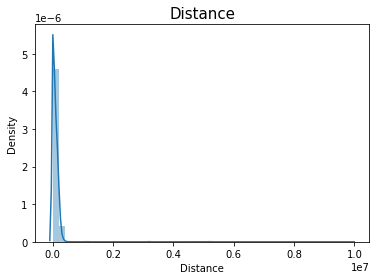

In [43]:
sns.distplot(df_train['Distance'])
plt.title('Distance',fontsize=15)
plt.show()

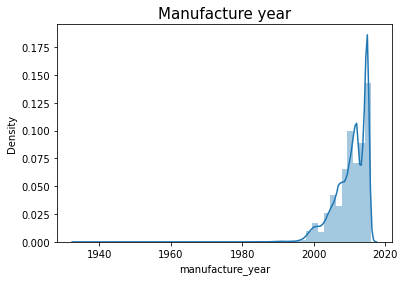

In [44]:
sns.distplot(df_train['manufacture_year'])
plt.title('Manufacture year',fontsize=15)
plt.show()

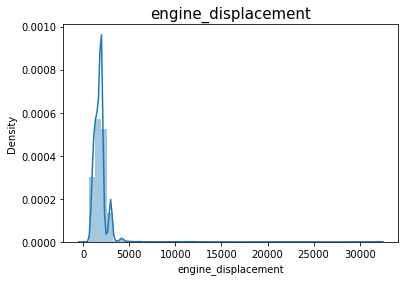

In [45]:
sns.distplot(df_train['engine_displacement'])
plt.title('engine_displacement',fontsize=15)
plt.show()

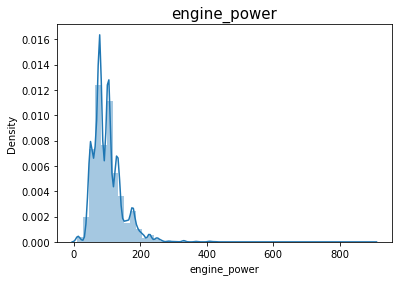

In [46]:
sns.distplot(df_train['engine_power'])
plt.title('engine_power',fontsize=15)
plt.show()

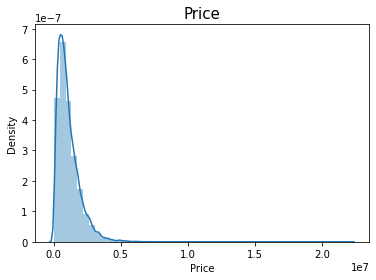

In [47]:
sns.distplot(df_train['Price'])
plt.title('Price',fontsize=15)
plt.show()

In [48]:
#checking for skewness in data
df_train.skew()

Distance               23.598812
manufacture_year       -1.913686
Age of car              1.913686
engine_displacement    12.740059
engine_power            1.778464
Vroom Audit Rating      0.005374
door_count             -1.257498
seat_count             -1.841518
Price                   2.179268
Ahmedabad               2.885140
Bangalore               2.842051
Chennai                 2.858255
Coimbatore              2.802908
Delhi                   2.862236
Hyderabad               2.868628
Jaipur                  2.844018
Kochi                   2.807119
Kolkata                 2.845593
Mumbai                  2.846775
Pune                    2.846775
First                   1.151766
Fourth & Above          1.157879
Second                  1.156031
Third                   1.153263
auto                    0.802662
man                    -0.802662
diesel                 -0.061490
petrol                  0.061490
dtype: float64

Bivariate Analysis


<AxesSubplot:xlabel='Maker', ylabel='Price'>

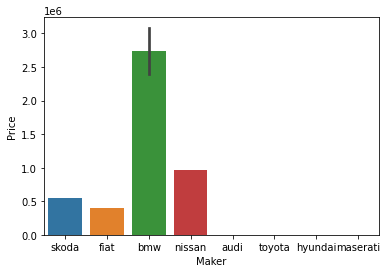

In [49]:
sns.barplot(y= df_train["Price"].head(5), x=df_train["Maker"], data=df_train)

<AxesSubplot:xlabel='model', ylabel='Price'>

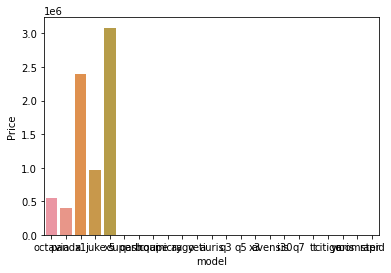

In [50]:
sns.barplot(y= df_train["Price"].head(5), x=df_train["model"], data=df_train)

In [ ]:
sns.lineplot(x=df_train["Distance"], y=df_train["Price"], data=df_train)

In [ ]:
sns.lineplot(x=df_train["engine_power"], y=df_train["Price"], data=df_train)

In [ ]:
sns.lineplot(x=df_train["engine_displacement"], y=df_train["Price"], data=df_train)

Multivariate Analysis


In [55]:
corr = df_train.corr()
corr

,Distance,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,door_count,seat_count,Price,Ahmedabad,...,Mumbai,Pune,First,Fourth & Above,Second,Third,auto,man,diesel,petrol
Distance,1.000000,-0.212059,0.212059,0.086514,0.011329,-0.006315,0.072100,0.024634,-0.151135,-0.004526,...,0.005123,-0.004834,0.005277,-0.003747,0.002479,-0.004013,-0.018565,0.018565,0.019877,-0.019877
manufacture_year,-0.212059,1.000000,-1.000000,-0.089587,0.051104,0.003967,0.059278,0.042861,0.507193,-0.000708,...,-0.000938,-0.003517,0.003549,0.007440,-0.012850,0.001860,0.128190,-0.128190,0.112645,-0.112645
Age of car,0.212059,-1.000000,1.000000,0.089587,-0.051104,-0.003967,-0.059278,-0.042861,-0.507193,0.000708,...,0.000938,0.003517,-0.003549,-0.007440,0.012850,-0.001860,-0.128190,0.128190,-0.112645,0.112645
engine_displacement,0.086514,-0.089587,0.089587,1.000000,0.318030,-0.006192,0.096297,0.077830,0.162554,0.001847,...,0.012948,-0.000512,0.002026,-0.006221,-0.000983,0.005171,0.208148,-0.208148,0.125997,-0.125997
engine_power,0.011329,0.051104,-0.051104,0.318030,1.000000,-0.001574,-0.116547,0.055857,0.621659,-0.003170,...,-0.004182,-0.000965,0.002480,-0.005211,-0.006089,0.008810,0.506844,-0.506844,0.289627,-0.289627
Vroom Audit Rating,-0.006315,0.003967,-0.003967,-0.006192,-0.001574,1.000000,-0.006146,-0.003010,0.005145,-0.007382,...,0.000501,0.005140,0.002934,-0.004723,-0.000908,0.002691,-0.003124,0.003124,0.002752,-0.002752
door_count,0.072100,0.059278,-0.059278,0.096297,-0.116547,-0.006146,1.000000,0.407573,-0.088659,0.001255,...,-0.002066,0.002144,-0.000798,-0.007273,-0.004301,0.012363,-0.009876,0.009876,0.192109,-0.192109
seat_count,0.024634,0.042861,-0.042861,0.077830,0.055857,-0.003010,0.407573,1.000000,0.081633,-0.002749,...,-0.001570,0.014104,-0.000003,-0.001925,-0.011455,0.013374,0.104408,-0.104408,0.234658,-0.234658
Price,-0.151135,0.507193,-0.507193,0.162554,0.621659,0.005145,-0.088659,0.081633,1.000000,-0.004769,...,-0.005031,-0.003499,0.007805,-0.002979,-0.009357,0.004521,0.499115,-0.499115,0.315919,-0.315919
Ahmedabad,-0.004526,-0.000708,0.000708,0.001847,-0.003170,-0.007382,0.001255,-0.002749,-0.004769,1.000000,...,-0.098872,-0.098872,0.006441,-0.002860,0.003911,-0.007495,0.000618,-0.000618,-0.000078,0.000078


<AxesSubplot:>

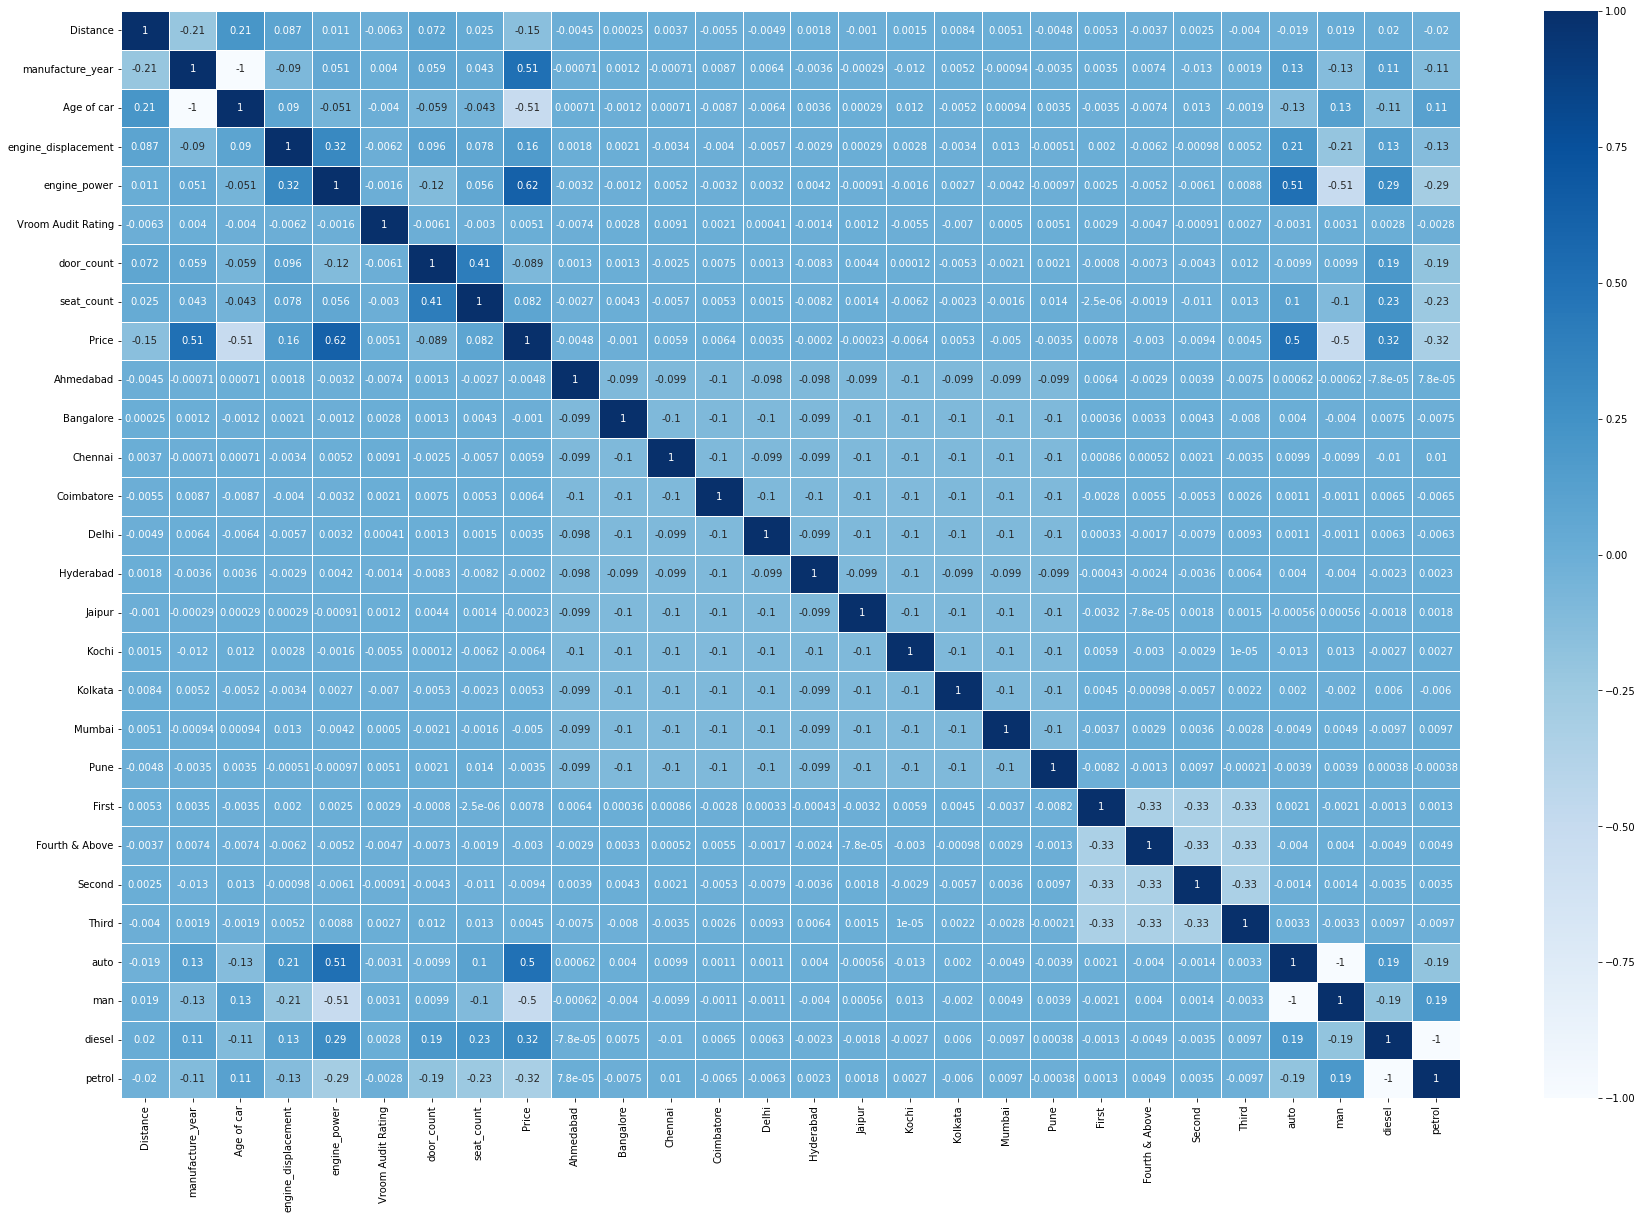

In [56]:
fig, ax = plt.subplots(figsize=(30,20))  
sns.heatmap(corr, annot=True, linewidths=.5, ax=ax, cmap='Blues', vmax=1.0, vmin=-1.0)

# Dealing with Outliers

In [57]:
#creating a copy of only numerical features
df_num = df_train.select_dtypes(include=np.number)
df_num.head(10)

,Distance,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,door_count,seat_count,Price,Ahmedabad,...,Mumbai,Pune,First,Fourth & Above,Second,Third,auto,man,diesel,petrol
0,5.0,1964,55,1964,147.0,8,5,5,543764.25,1,...,0,0,0,0,1,0,0,1,0,1
1,27750.0,2012,7,1242,51.0,6,4,4,401819.25,1,...,0,0,0,0,0,1,0,1,0,1
2,46000.0,2014,5,1995,105.0,7,4,5,2392855.50,0,...,0,0,0,0,0,1,1,0,1,0
3,43949.0,2011,8,1618,140.0,7,4,5,958606.50,0,...,1,0,0,0,0,1,0,1,0,1
4,59524.0,2012,7,2993,180.0,7,4,5,3085561.50,0,...,0,0,0,1,0,0,1,0,1,0
5,12015.0,2015,4,1968,110.0,4,4,5,1543728.75,0,...,0,0,1,0,0,0,0,1,1,0
6,181000.0,2009,10,1968,125.0,6,5,5,915985.50,0,...,0,0,0,1,0,0,1,0,1,0
7,33100.0,2010,9,1108,40.0,5,5,5,327535.50,0,...,0,0,0,0,1,0,0,1,0,1
8,17375.0,2015,4,1600,96.0,5,4,5,1361480.25,0,...,0,0,1,0,0,0,0,1,1,0
9,97640.0,2010,9,2000,103.0,6,5,5,885455.25,0,...,1,0,0,1,0,0,0,1,1,0


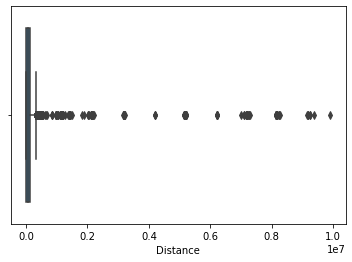

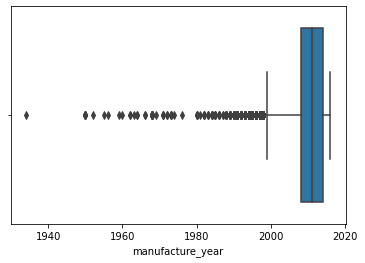

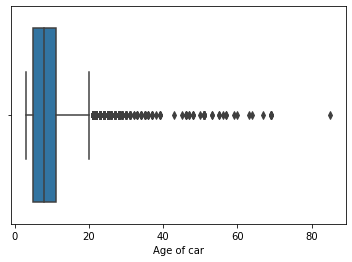

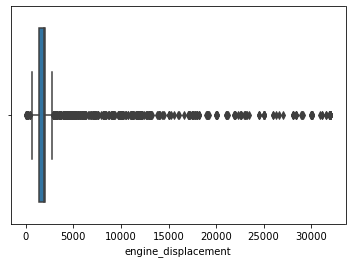

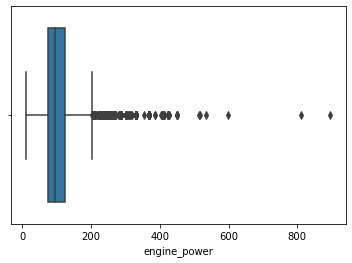

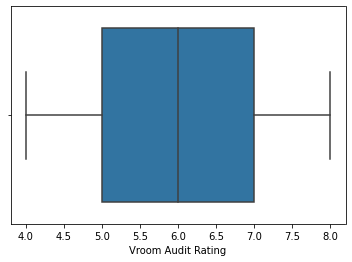

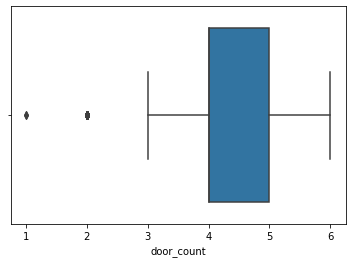

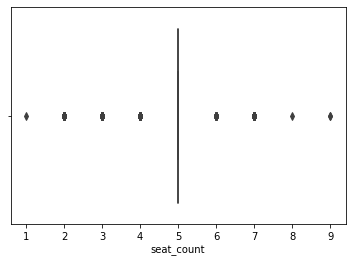

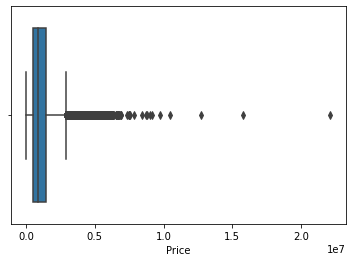

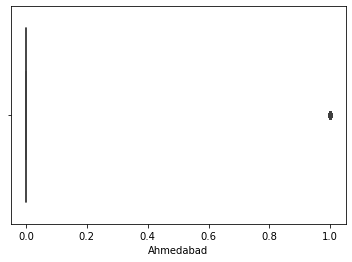

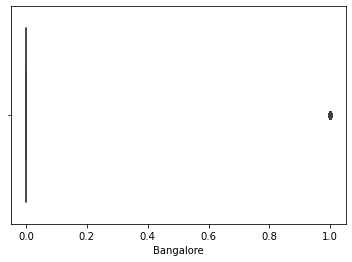

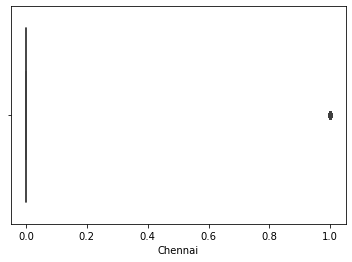

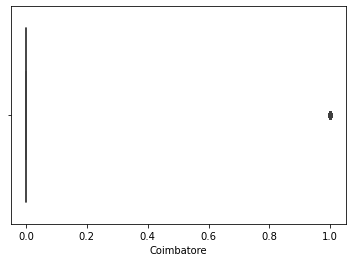

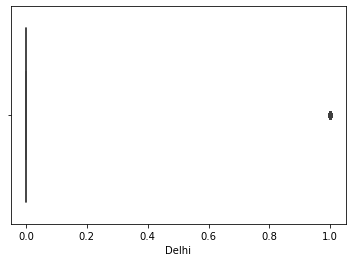

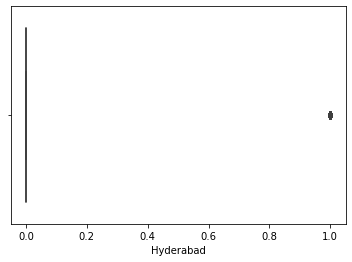

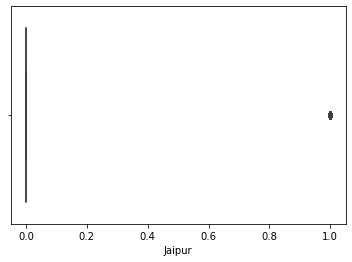

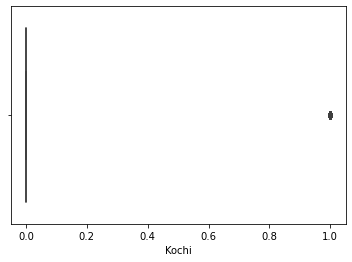

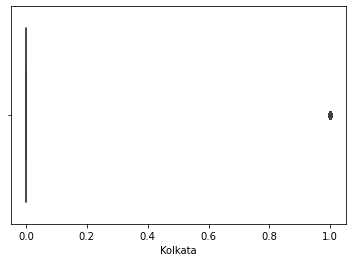

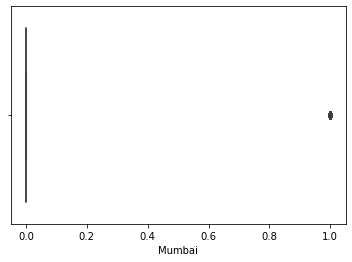

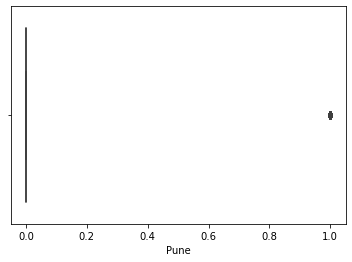

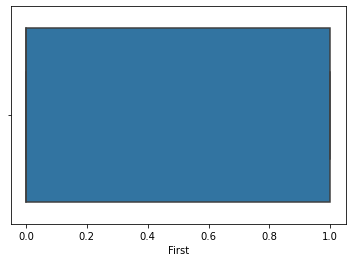

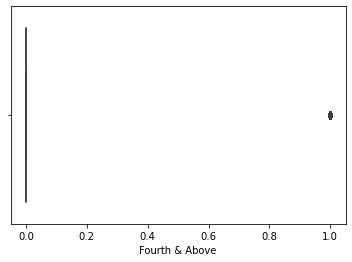

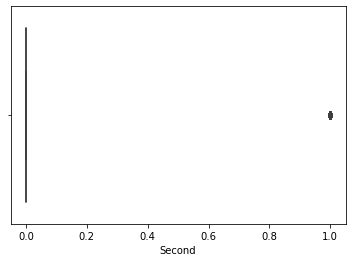

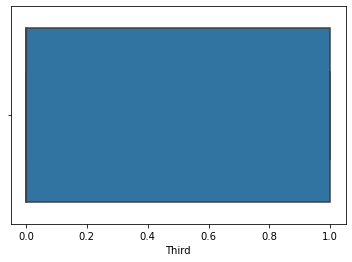

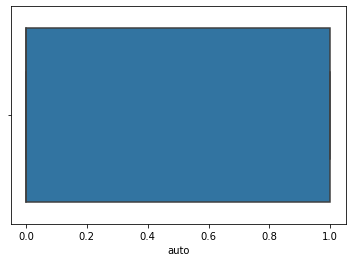

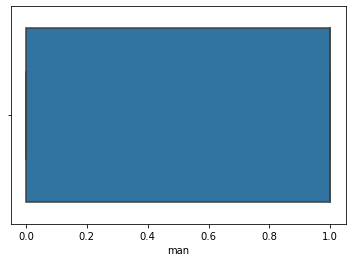

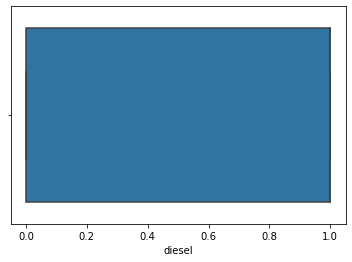

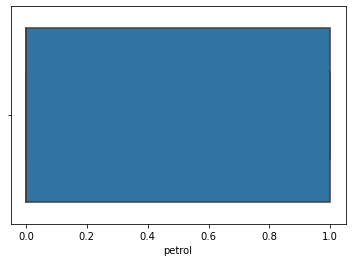

In [58]:
for i in df_num:
    sns.boxplot(df_num[i])
    plt.show()

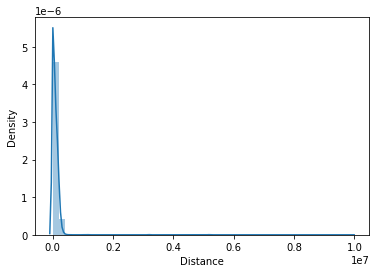

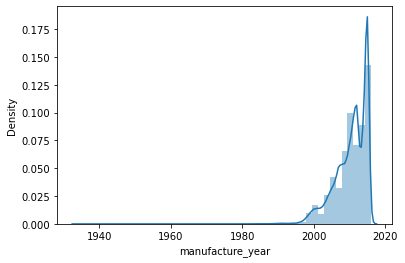

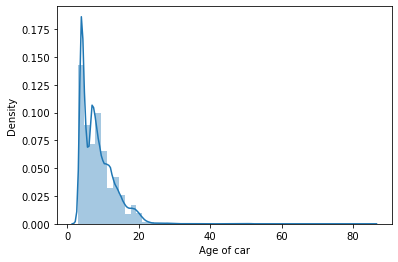

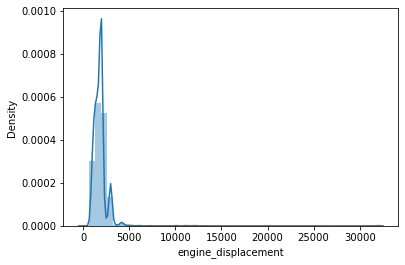

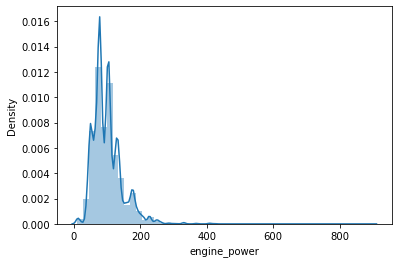

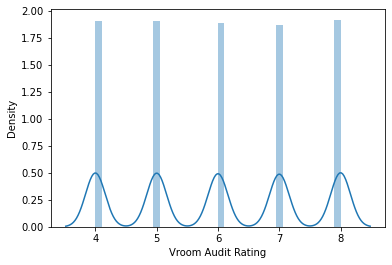

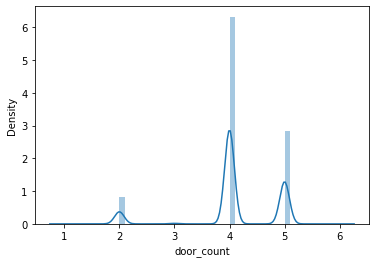

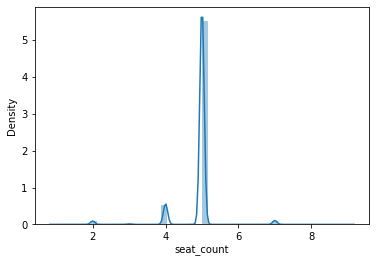

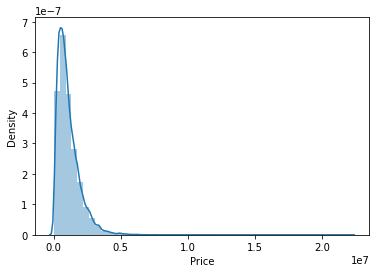

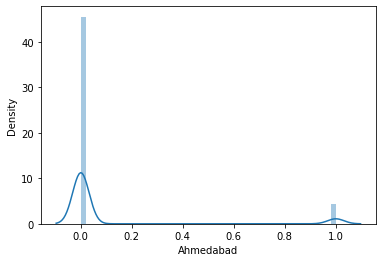

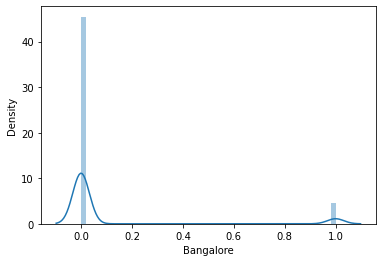

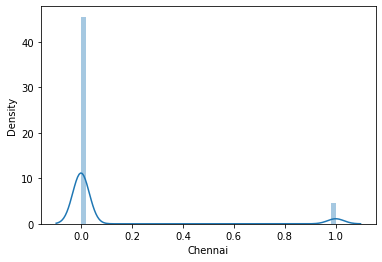

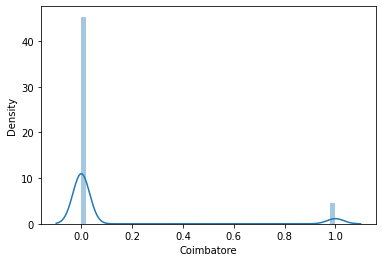

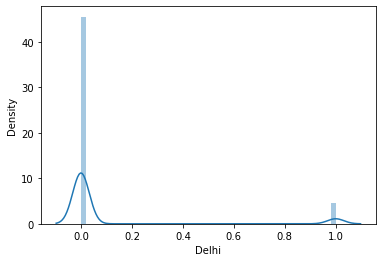

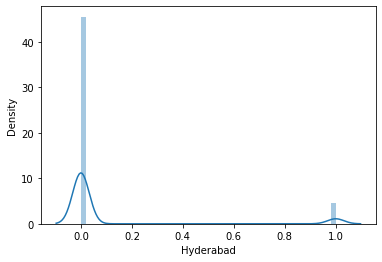

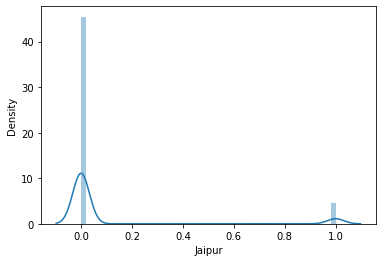

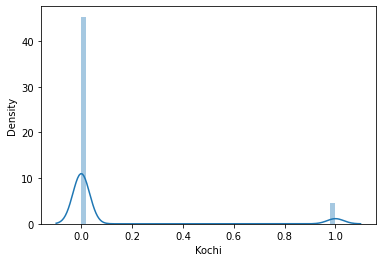

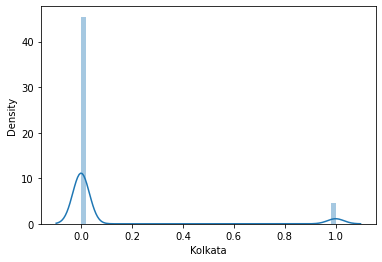

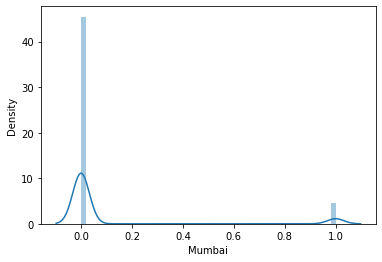

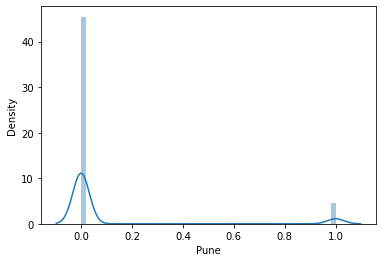

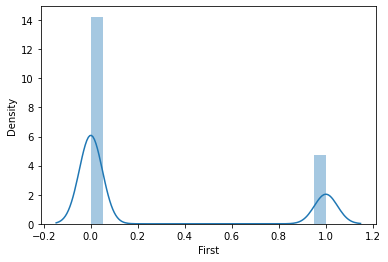

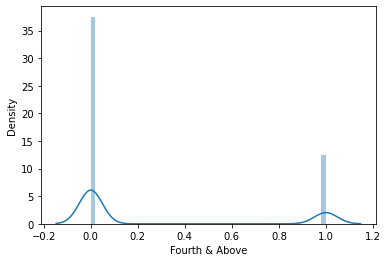

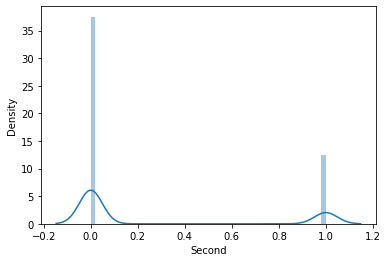

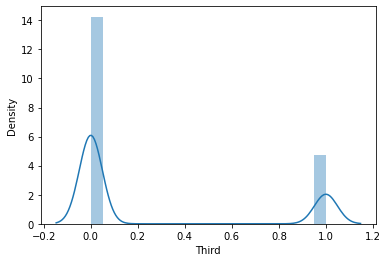

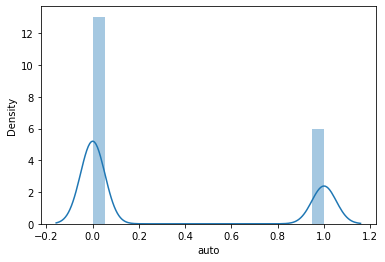

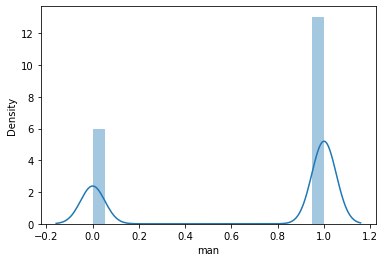

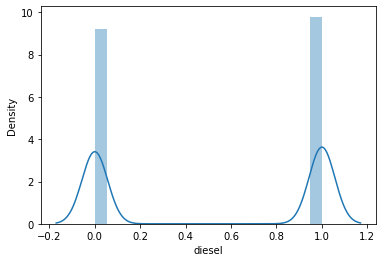

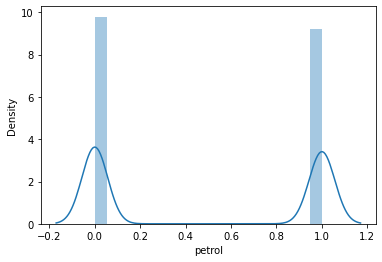

In [59]:
for i in df_num:
    sns.distplot(df_num[i])
    plt.show()

In [104]:
df_num.skew()

Distance               23.598812
manufacture_year       -1.913686
Age of car              1.913686
engine_displacement    12.740059
engine_power            1.778464
Vroom Audit Rating      0.005374
door_count             -1.257498
seat_count             -1.841518
Price                   2.179268
Ahmedabad               2.885140
Bangalore               2.842051
Chennai                 2.858255
Coimbatore              2.802908
Delhi                   2.862236
Hyderabad               2.868628
Jaipur                  2.844018
Kochi                   2.807119
Kolkata                 2.845593
Mumbai                  2.846775
Pune                    2.846775
First                   1.151766
Fourth & Above          1.157879
Second                  1.156031
Third                   1.153263
auto                    0.802662
man                    -0.802662
diesel                 -0.061490
petrol                  0.061490
dtype: float64

Applying Capping technique

In [60]:
## Calculate IQR
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3-Q1

ll = Q1-(1.5*IQR)
UL = Q3+(1.5*IQR)

In [61]:
# Replace every outlier on the lower side by the lower whisker
df_num = pd.DataFrame(np.where(df_num>UL,UL,df_num),columns=df_num.columns)

# Replace every outlier on the upper side by the upper whisker 
df_num = pd.DataFrame(np.where(df_num<ll,ll,df_num),columns=df_num.columns)

<AxesSubplot:>

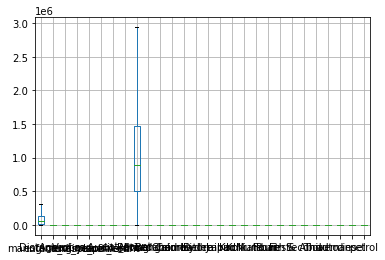

In [62]:
df_num.boxplot()

In [63]:
df_num.shape

(53401, 28)

In [64]:
df_num.skew()

Distance               0.885565
manufacture_year      -0.911343
Age of car             0.911343
engine_displacement    0.615949
engine_power           0.777050
Vroom Audit Rating     0.005374
door_count            -0.702055
seat_count             0.000000
Price                  0.945979
Ahmedabad              0.000000
Bangalore              0.000000
Chennai                0.000000
Coimbatore             0.000000
Delhi                  0.000000
Hyderabad              0.000000
Jaipur                 0.000000
Kochi                  0.000000
Kolkata                0.000000
Mumbai                 0.000000
Pune                   0.000000
First                  1.151766
Fourth & Above         0.000000
Second                 0.000000
Third                  1.153263
auto                   0.802662
man                   -0.802662
diesel                -0.061490
petrol                 0.061490
dtype: float64

As you can see, we have successfully dealt with the skewness inherently dealing with outliers

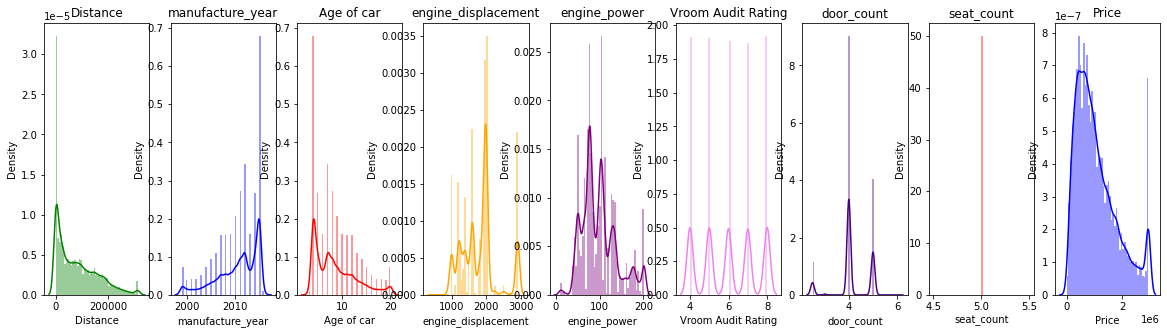

In [65]:
plt.figure(figsize=(20,5))
plt.subplot(1, 9, 1)
plt.title('Distance')
sns.distplot(df_num['Distance'],color='green')
plt.subplot(1, 9, 2)
plt.title('manufacture_year')
sns.distplot(df_num['manufacture_year'],color='blue')
plt.subplot(1, 9, 3)
plt.title('Age of car')
sns.distplot(df_num['Age of car'],color='red')
plt.subplot(1, 9, 4)
plt.title('engine_displacement')
sns.distplot(df_num['engine_displacement'],color='orange')
plt.subplot(1, 9, 5)
plt.title('engine_power')
sns.distplot(df_num['engine_power'],color='purple')
plt.subplot(1, 9, 6)
plt.title('Vroom Audit Rating')
sns.distplot(df_num['Vroom Audit Rating'],color='violet')
plt.subplot(1, 9, 7)
plt.title('door_count')
sns.distplot(df_num['door_count'],color='indigo')
plt.subplot(1, 9, 8)
plt.title('seat_count')
sns.distplot(df_num['seat_count'],color='red')
plt.subplot(1, 9, 9)
plt.title('Price')
sns.distplot(df_num['Price'],color='blue')
plt.show()

# Feature Scaling

In [66]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53401 entries, 0 to 53400
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Distance             53401 non-null  float64
 1   manufacture_year     53401 non-null  float64
 2   Age of car           53401 non-null  float64
 3   engine_displacement  53401 non-null  float64
 4   engine_power         53401 non-null  float64
 5   Vroom Audit Rating   53401 non-null  float64
 6   door_count           53401 non-null  float64
 7   seat_count           53401 non-null  float64
 8   Price                53401 non-null  float64
 9   Ahmedabad            53401 non-null  float64
 10  Bangalore            53401 non-null  float64
 11  Chennai              53401 non-null  float64
 12  Coimbatore           53401 non-null  float64
 13  Delhi                53401 non-null  float64
 14  Hyderabad            53401 non-null  float64
 15  Jaipur               53401 non-null 

In [67]:
X = df_num.iloc[:, 0:8].values
y = df_num.iloc[:, 8].values

In [68]:
X.shape

(53401, 8)

In [69]:
y.shape

(53401,)

Splitting the data into test and train

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [71]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Applying and training the model and pickling it

In [72]:
regressor = RandomForestRegressor(n_estimators=50, random_state=0)
regressor.fit(X_train, y_train)
y_pred_RFR = regressor.predict(X_test)

In [73]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_RFR))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_RFR))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_RFR)))

Mean Absolute Error: 120268.75843916035
Mean Squared Error: 38871213358.00645
Root Mean Squared Error: 197157.8386927754


In [74]:
xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)
y_pred_XG = xgb_model.predict(X_test)

In [75]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_XG))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_XG))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_XG)))

Mean Absolute Error: 121041.49189747538
Mean Squared Error: 35205657457.90902
Root Mean Squared Error: 187631.70696315967


In [76]:
pickle.dump(regressor, open('RFR_final.sav', 'wb'))
pickle.dump(xgb_model, open('XGB_final.sav', 'wb'))